In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from scipy.stats import ttest_ind

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

### Presenting the same data multiple ways
### by: Will Becerra
### April 2018

2016 Olympics in Rio de Janeiro: Athletes, medals, and events from summer games

https://www.kaggle.com/rio2016/olympic-games

Questions:
1. Choose one variable and plot that variable four different ways.
2. Choose two continuous variables, and plot them three different ways.
3. Choose one continuous variable and one categorical variable, and plot them six different ways.

In [2]:
df = pd.read_csv('athletes.csv')

In [3]:
df.info

<bound method DataFrame.info of               id                      name nationality     sex       dob  \
0      736041664            A Jesus Garcia         ESP    male  10/17/69   
1      532037425                A Lam Shin         KOR  female   9/23/86   
2      435962603               Aaron Brown         CAN    male   5/27/92   
3      521041435                Aaron Cook         MDA    male    1/2/91   
4       33922579                Aaron Gate         NZL    male  11/26/90   
5      173071782               Aaron Royle         AUS    male   1/26/90   
6      266237702             Aaron Russell         USA    male    6/4/93   
7      382571888             Aaron Younger         AUS    male   9/25/91   
8       87689776       Aauri Lorena Bokesa         ESP  female  12/14/88   
9      997877719           Ababel Yeshaneh         ETH  female   7/22/91   
10     343694681               Abadi Hadis         ETH    male   11/6/97   
11     591319906      Abbas Abubakar Abbas         BRN  

In [4]:
df.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

In [5]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
df.isnull().sum()/df.count()

id             0.000000
name           0.000000
nationality    0.000000
sex            0.000000
dob            0.000087
height         0.029443
weight         0.060575
sport          0.000000
gold           0.000000
silver         0.000000
bronze         0.000000
dtype: float64

In [7]:
df['height'].fillna(value = np.mean(df['height']), inplace=True)
df['weight'].fillna(value = np.mean(df['weight']), inplace=True)

In [8]:
df.dtypes

id               int64
name            object
nationality     object
sex             object
dob             object
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
dtype: object

## 1. Choose one variable and plot that variable four different ways.

The KDE plot for the athlete height variables shows the 2 peaks for make and female athlete heights.  The boxplot show a narrow box with a tight concentration of heights near the mean.

Text(0.5,1,'Athlete Heights')

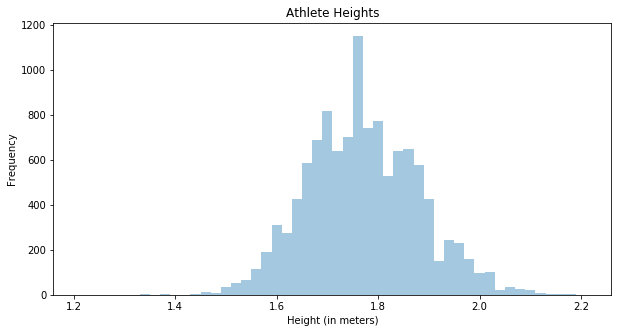

In [9]:
plt.figure(figsize=(10, 5))

#distplot plots kernel density estimate by default. for reg histogram set to False
sns.distplot(df.height, kde=False)
plt.xlabel('Height (in meters)')
plt.ylabel('Frequency')
plt.title('Athlete Heights')

Text(0.5,1,'Athlete Heights')

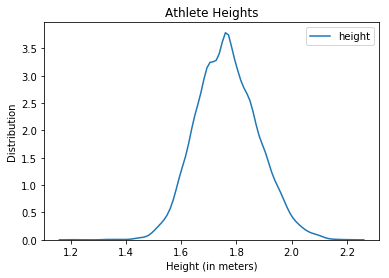

In [10]:
sns.kdeplot(df.height)
plt.xlabel('Height (in meters)')
plt.ylabel('Distribution')
plt.title('Athlete Heights')

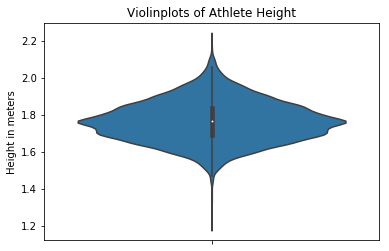

In [11]:
sns.violinplot(y="height", data=df, split = True)
plt.ylabel('Height in meters')
plt.title('Violinplots of Athlete Height')
plt.show()

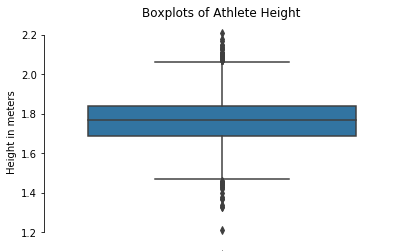

In [12]:
sns.boxplot(y='height', data=df) 
plt.ylabel('Height in meters')
plt.title('Boxplots of Athlete Height')
sns.despine(offset=10, trim=True)
plt.show()

## 2. Choose two continuous variables, and plot them three different ways.

The lmplot with the regression lines for each sex serves to show that male weight increases more sharply than female weight relative to height.

Text(0.5,1,'Jointplot of Athlete Weight vs Height')

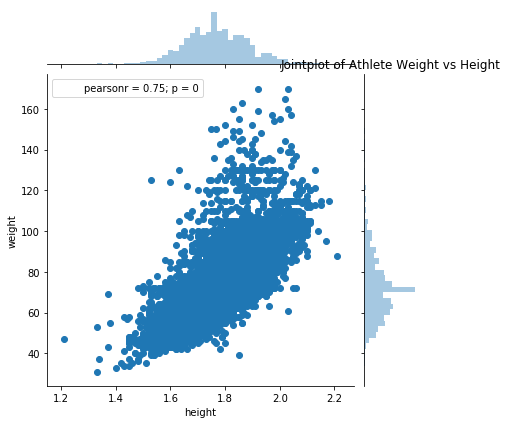

In [13]:
sns.jointplot(x="height", y="weight", data=df)
plt.title('Jointplot of Athlete Weight vs Height')

Text(0.5,1,'Regression Plot of Athlete Weight vs Height with Regression Line')

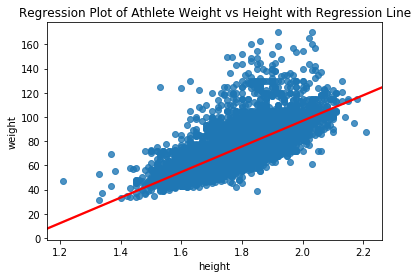

In [14]:
sns.regplot(x="height", y="weight", line_kws={"color": "red"},data=df)
plt.title('Regression Plot of Athlete Weight vs Height with Regression Line')

Text(0.5,1,'Scatter Plot of Athlete Weight vs Height with Regression Lines')

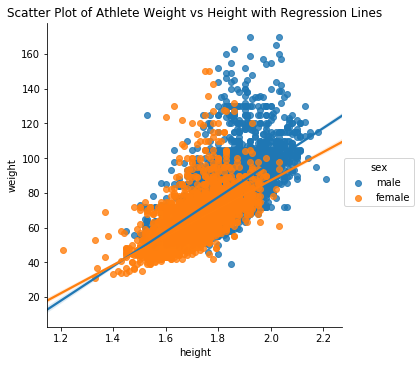

In [17]:
sns.lmplot(x="height", y="weight", data=df, hue="sex")
plt.title('Scatter Plot of Athlete Weight vs Height with Regression Lines')

## 3. Choose one continuous variable and one categorical variable, and plot them six different ways.
The histogram with overlapping distributions of different colors (red and blue) with transparency best shows the difference in frequency distribution.  The KDE plot showing both height distributions also shows the difference well.

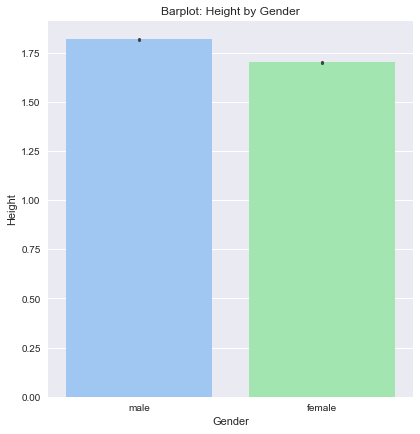

In [16]:
sns.set(style="darkgrid")

g = sns.factorplot(x="sex", y="height", data=df,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Height")
g.set_xlabels("Gender")
plt.title('Barplot: Height by Gender')
plt.show()

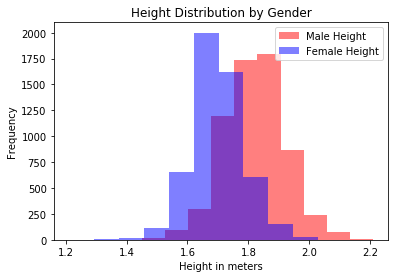

In [21]:
menheight = df.loc[(df['sex']=='male')&(df['height']),'height']
womenheight = df.loc[(df['sex']=='female')&(df['height']),'height']

plt.hist(menheight, color='red',  alpha=.5,label='Male Height')
plt.hist(womenheight, color='blue', alpha=.5,label='Female Height')

plt.xlabel('Height in meters')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Height Distribution by Gender')
plt.show()

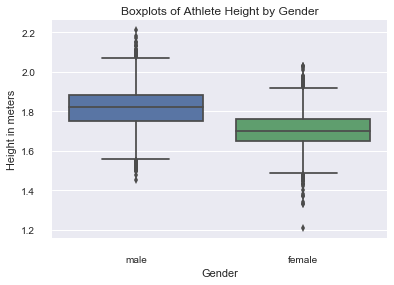

In [18]:
sns.boxplot(x='sex', y='height', data=df) 
plt.ylabel('Height in meters')
plt.xlabel("Gender")
plt.title('Boxplots of Athlete Height by Gender')
sns.despine(offset=10, trim=True)
plt.show()

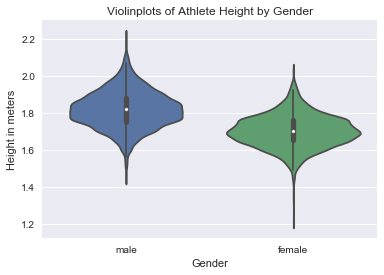

In [19]:
sns.violinplot(x="sex", y="height", data=df, split = True)
plt.ylabel('Height in meters')
plt.xlabel("Gender")
plt.title('Violinplots of Athlete Height by Gender')
plt.show()

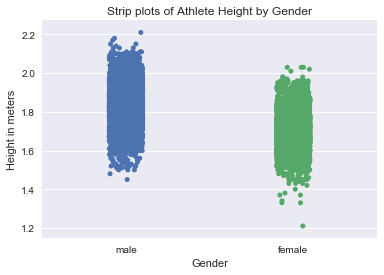

In [20]:
sns.stripplot(x="sex", y="height", data=df, jitter = True)
plt.ylabel('Height in meters')
plt.xlabel("Gender")
plt.title('Strip plots of Athlete Height by Gender')
plt.show()

Text(0.5,1,'Athlete Heights')

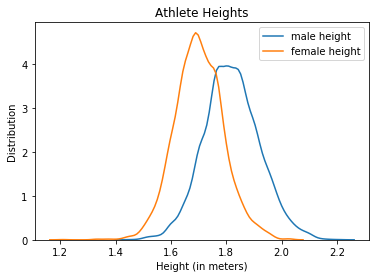

In [25]:
sns.kdeplot(menheight, label="male height")
sns.kdeplot(womenheight, label="female height")
plt.xlabel('Height (in meters)')
plt.ylabel('Distribution')
plt.title('Athlete Heights')